In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import json

In [2]:
from time import time as time
t0 = time()
nfiles = 3
nwindow = 400

In [3]:
runno = '7479'
Ecut = (2000, 15000)

In [4]:
def gauss(x, A, m, s):
    return A*np.exp(-(x-m)**2 / (2*s**2))

from scipy.optimize import curve_fit

def exp_dt(sig):
    """
    expected drift distance  as a function of sigma of the S2 signal (Zrms from kdst 2018 version)
    parameters from the ad-hoc fit
    """
    p = [-10.00667732,  52.1855012,   12.68195726,  58.66322846, -20.11819297]
    dt = p[0] * sig**4 + p[1] * sig**3 + p[2]*sig**2 + p[3]*sig + p[4]
    return dt

In [5]:
indir = '/Volumes/NEXT_data/IC_Data/krThesis/sliding_window_events/variable_window_'+runno+'_all/'
all_files = [indir+file for file in os.listdir(indir)][:nfiles]

In [6]:
# jsondir = '/Volumes/NEXT_data/IC_Data/krThesis/sliding_window_events/variable_window_'+runno+'_json/'
# all_jsons = [jsondir+file for file in os.listdir(jsondir)][:nfiles]

In [7]:
# all_jsons

In [8]:
events_window_maxX =  []
events_window_maxY =  []
events_window_rms =  []
events_window_width =  []
events_window_energy =  []
events_window_charge = []
events_window_Zrms = []
events_window_Zgauss =  []
events_sumwf = []
events_times = []

In [9]:
# all_data = {
#     'events_window_maxX' : [],
#     'events_window_maxY' : [],
#     'events_window_rms' : [],
#     'events_window_width' : [],
#     'events_window_energy' : [],
#     'events_window_charge' : [],
#     'events_window_Zrms' : [],
#     'events_window_Zgauss' : [],
#     'events_sumwf' : [],
#     'events_times' : [],
#     'event_numbers' : []
# }

# for filename in all_jsons:
#     f = open(filename)
#     new_dict = json.load(f)
#     for k in new_dict.keys():
#         all_data[k].extend(new_dict[k])

In [10]:
# events_window_maxX = all_data['events_window_maxX']
# events_window_maxY = all_data['events_window_maxY']
# events_window_rms = all_data['events_window_rms']
# events_window_width = all_data['events_window_maxX']
# events_window_energy = all_data['events_window_energy']
# events_window_charge = all_data['events_window_charge']
# events_window_Zrms = all_data['events_window_Zrms']
# events_window_Zgauss = all_data['events_window_Zgauss']
# events_sumwf = all_data['events_sumwf']
# events_times = all_data['events_times']

In [11]:
n_total = len(all_files)
n = 0
for filename in all_files:

    print('Time =', round(time() - t0, 1))
    t0 = time()
    
    n += 1
    print(n, '/', n_total)

    infile = open(filename, 'r')
    
    data = infile.read()
    infile.close()
    
    events_window_maxX.extend(eval(data[data.find('=')+1:data.find(']]')+2]))
    data = data[data.find(']]')+3:]
    print('Got maxX. Next item:', data[:25])
    
    events_window_maxY.extend(eval(data[data.find('=')+1:data.find(']]')+2]))
    data = data[data.find(']]')+3:]
    print('Got maxY. Next item:', data[:25])
    
    events_window_rms.extend(eval(data[data.find('=')+1:data.find(']]')+2]))
    data = data[data.find(']]')+3:]
    print('Got rms. Next item:', data[:25])

    events_window_width.extend(eval(data[data.find('=')+1:data.find(']]')+2]))
    data = data[data.find(']]')+3:]
    print('Got width. Next item:', data[:25])

    events_window_energy.extend(eval(data[data.find('=')+1:data.find(']]')+2]))
    data = data[data.find(']]')+3:]
    print('Got energy. Next item:', data[:25])

    events_window_charge.extend(eval(data[data.find('=')+1:data.find(']]')+2]))
    data = data[data.find(']]')+3:]
    print('Got charge. Next item:', data[:25])

    events_window_Zrms.extend(eval(data[data.find('=')+1:data.find(']]')+2]))
    data = data[data.find(']]')+3:]
    print('Got Zrms. Next item:', data[:25])

    sum_wf_all = eval(data[data.find('=')+1:data.find(']]')+2].replace('array', 'np.array'))
    sumwf_last = [ sum_wfs[-1] for sum_wfs in sum_wf_all ]
    
    events_sumwf.extend(sumwf_last)
    data = data[data.find(']]')+3:]
    print('Got sumwf. Next item:', data[:25])

    times_all = eval(data[data.find('=')+1:data.find(']]')+2].replace('array', 'np.array'))
    times_last = [ times[-1] for times in times_all ]
    
    events_times.extend(times_last)
    data = data[data.find(']]')+3:]
    print('Got times. Next item:', data[:25])

Time = 1.7
1 / 3
Got maxX. Next item: events_window_maxY=[[45.0
Got maxY. Next item: events_window_rms=[[0, 0,
Got rms. Next item: events_window_width=[[100
Got width. Next item: events_window_energy=[[5.
Got energy. Next item: events_window_charge=[[0.
Got charge. Next item: events_window_Zrms=[[-20.
Got Zrms. Next item: events_window_sumwf=[[arr
Got sumwf. Next item: events_window_times=[[arr
Got times. Next item: 
Time = 28.3
2 / 3
Got maxX. Next item: events_window_maxY=[[-115
Got maxY. Next item: events_window_rms=[[1270.
Got rms. Next item: events_window_width=[[500
Got width. Next item: events_window_energy=[[79
Got energy. Next item: events_window_charge=[[43
Got charge. Next item: events_window_Zrms=[[155.
Got Zrms. Next item: events_window_sumwf=[[arr
Got sumwf. Next item: events_window_times=[[arr
Got times. Next item: 
Time = 22.4
3 / 3
Got maxX. Next item: events_window_maxY=[[-45.
Got maxY. Next item: events_window_rms=[[1275.
Got rms. Next item: events_window_width=[[500

Z, Zrms = 226.76286736095543 , 1167.8875543994259


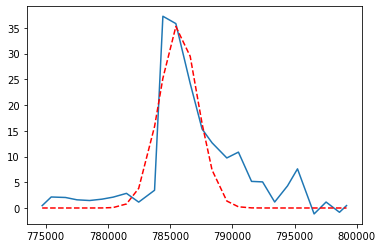

Z, Zrms = 19.49995410999679 , 132.3615184754088


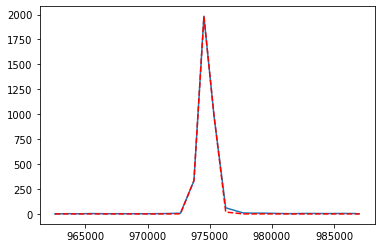

Z, Zrms = 961.8204400471972 , 801.9397749520039


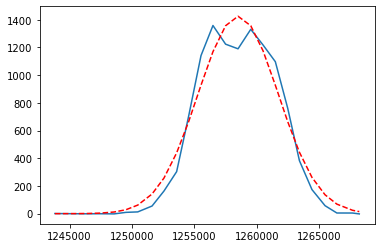

Z, Zrms = 459.1799889146097 , 688.7421801167424


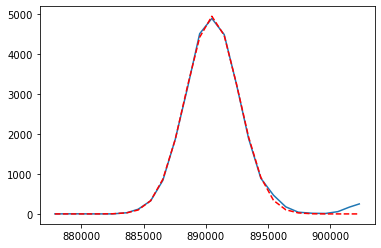

Z, Zrms = 57.15514664042868 , 700.0035773103992


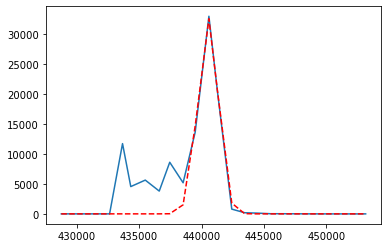

Z, Zrms = -5.9799680850754395 , 123.93676932379958


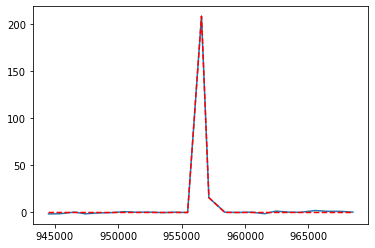

Z, Zrms = 5.408320507062829 , 1203.497200641008


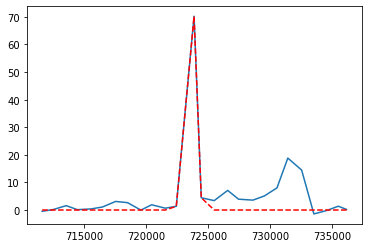

Z, Zrms = 158.77676199919853 , 1102.2134164748238


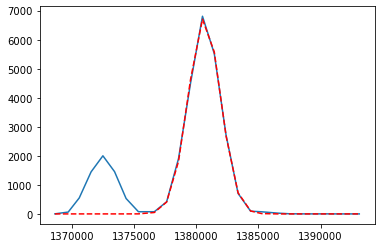

Z, Zrms = 19.22094794023361 , 1203.4944007437184


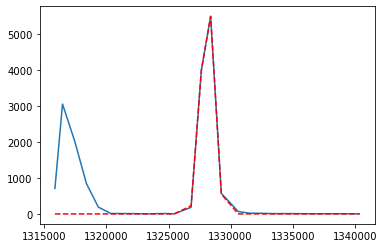

Z, Zrms = -161.13673138121953 , 146.17121334533323


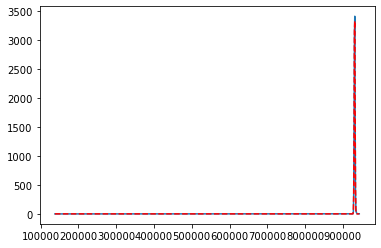

Z, Zrms = -119.6220667776509 , 3.5020836024427595


/Users/jmhaefner/miniconda/envs/IC-3.7-2020-06-16/lib/python3.7/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


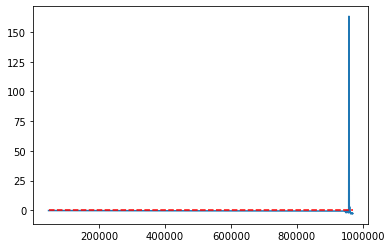

Z, Zrms = 472.9692865298443 , 1203.497404643425


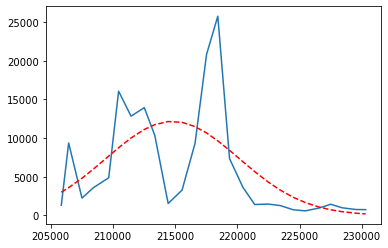

Z, Zrms = -1346512.8365582444 , 1203.476219740643


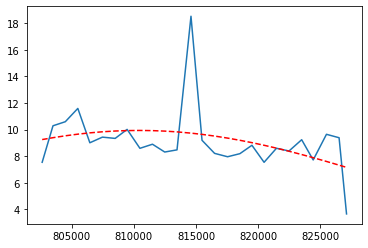

Z, Zrms = 240.8750934651875 , 1203.4937711855418


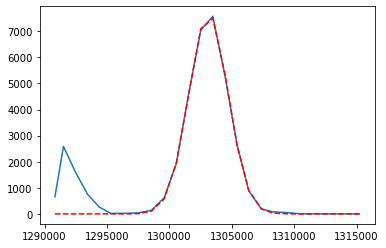

Z, Zrms = -104560.51721707676 , 1203.4388069827062


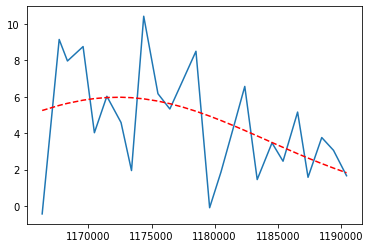

Z, Zrms = -1529.8180483464212 , 1203.4976165518258


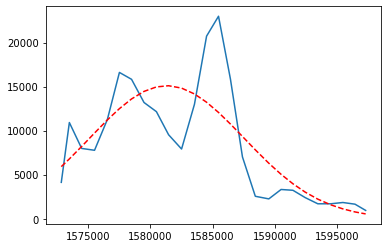

Z, Zrms = -507143.2646229616 , 1203.492282574391


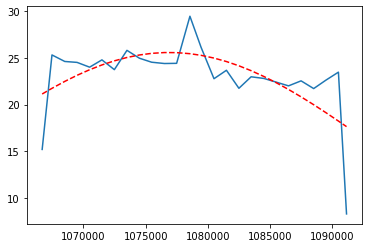

Z, Zrms = 319.5391609208594 , 1203.3946645593155


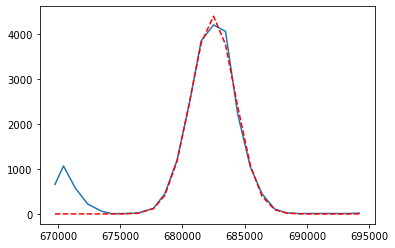

Z, Zrms = -425.1915372442578 , 299.14317458795676


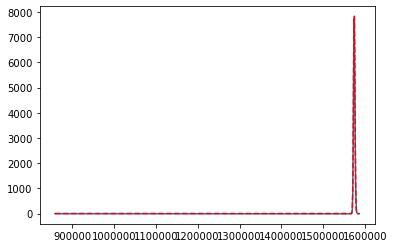

Z, Zrms = 274.11483199510764 , 792.5982395665517


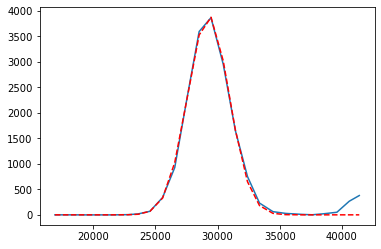

Z, Zrms = 164.77545327959407 , 1196.969931583667


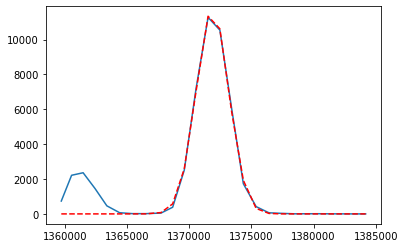

Z, Zrms = -175698568.19589686 , 418.2725337722936


/Users/jmhaefner/miniconda/envs/IC-3.7-2020-06-16/lib/python3.7/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


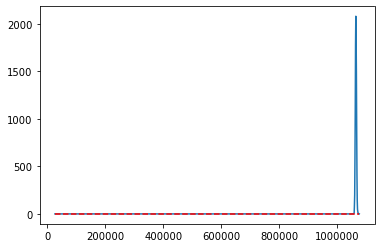

Z, Zrms = -32889.34194246874 , 1203.4596518871945


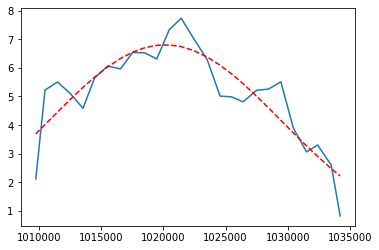

Z, Zrms = -222753.0099991336 , 1203.4958406170813


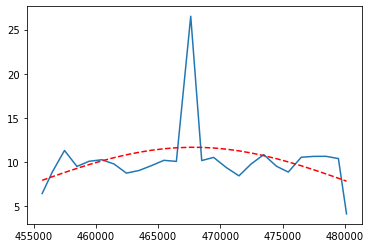

Z, Zrms = 859.2612058300001 , 517.9831830583411


/Users/jmhaefner/miniconda/envs/IC-3.7-2020-06-16/lib/python3.7/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


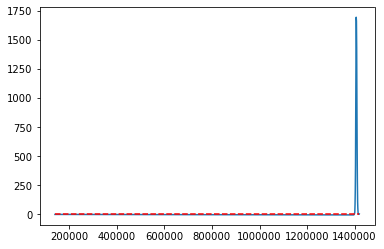

Z, Zrms = 859.2612058300001 , 347.20326860517747


/Users/jmhaefner/miniconda/envs/IC-3.7-2020-06-16/lib/python3.7/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


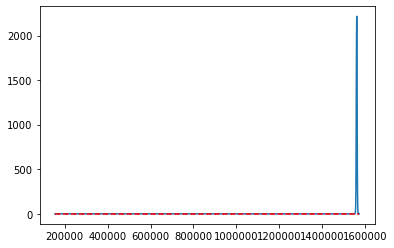

Z, Zrms = 859.2612058300001 , 241.17601075298035


/Users/jmhaefner/miniconda/envs/IC-3.7-2020-06-16/lib/python3.7/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


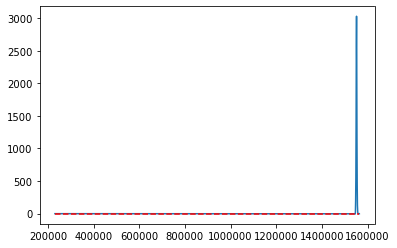

Z, Zrms = 422.86837303350813 , 1131.3707117370272


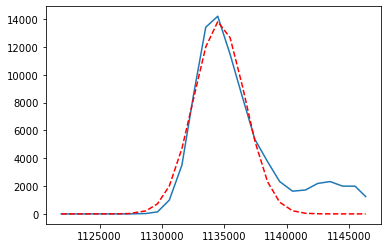

Z, Zrms = -651527.6092667471 , 1203.4960652441403


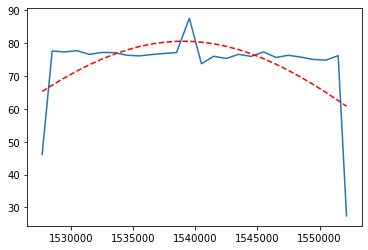

Z, Zrms = -44.902853487934266 , 67.72673513751981


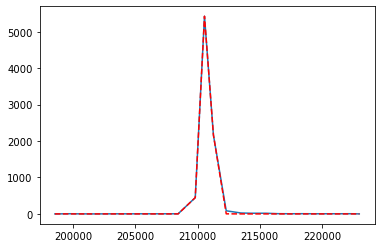

Z, Zrms = 899.5426763856234 , 1189.3586348531949


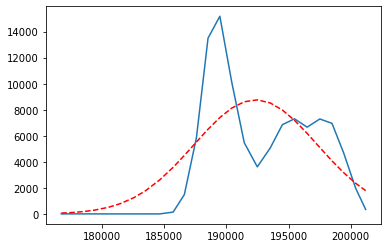

Z, Zrms = 354.1275308368647 , 226.21236245428955


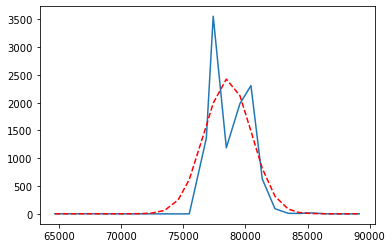

Z, Zrms = -3.8465488786153017 , 759.4198900162285


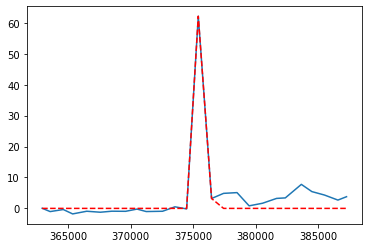

Z, Zrms = -2331737.336284259 , 471.9342778181545


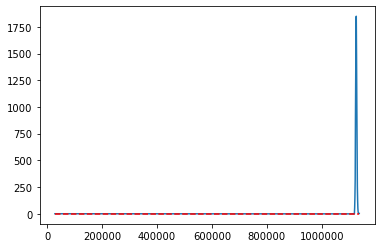

Z, Zrms = -47.31314445688852 , 56.603822802489134


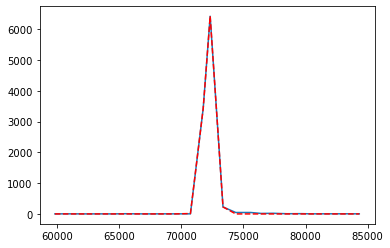

Z, Zrms = -114418.69171138549 , 1203.4643859855307


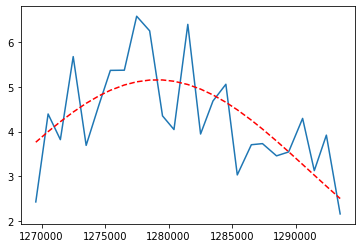

Z, Zrms = 498.81384573055095 , 881.7588443125986


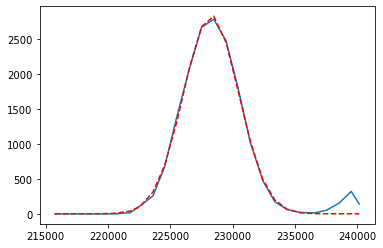

Z, Zrms = -459.2204446307409 , 312.8742513377041


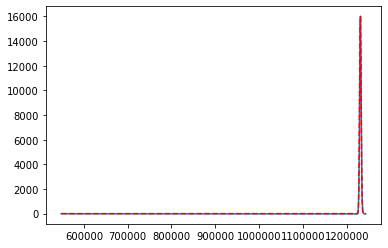

Z, Zrms = 859.2612058300001 , 292.2742277503959


/Users/jmhaefner/miniconda/envs/IC-3.7-2020-06-16/lib/python3.7/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


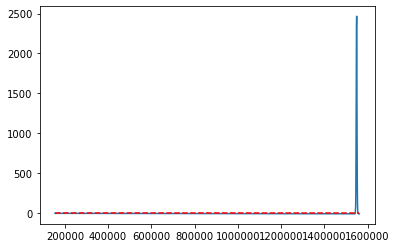

Z, Zrms = -492684866127983.1 , 86.69490284588237


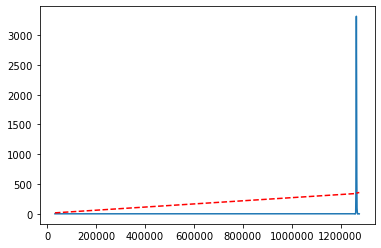

Z, Zrms = 644.8573834356747 , 1119.617963361831


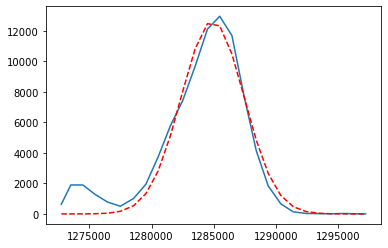

Z, Zrms = 582.6071675466019 , 700.9063466976743


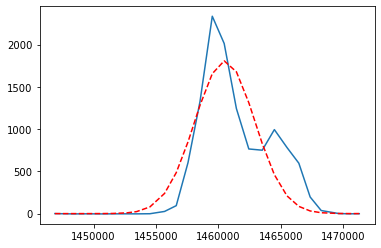

Z, Zrms = -2535.790961789648 , 1203.487019233024


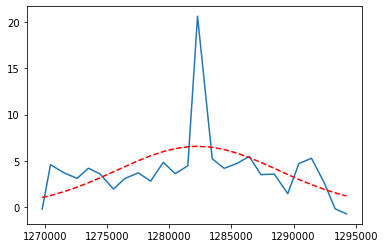

Z, Zrms = -38.04376925304951 , 576.6066883819665


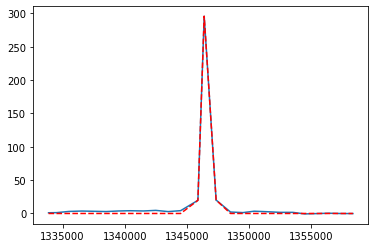

Z, Zrms = 449.1726354980653 , 581.1517396388816


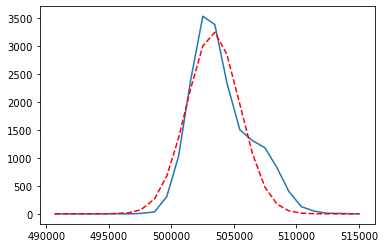

Z, Zrms = -842429992347470.0 , 435.652543488909


/Users/jmhaefner/miniconda/envs/IC-3.7-2020-06-16/lib/python3.7/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


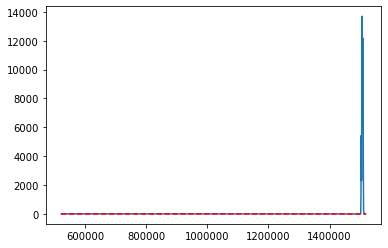

Z, Zrms = -31767.127481322288 , 1203.4843239922895


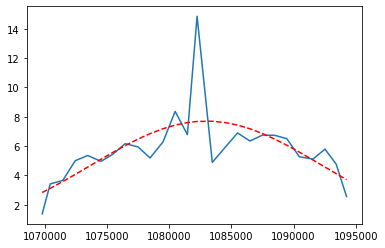

Z, Zrms = 14.098297198373555 , 428.8935427071767


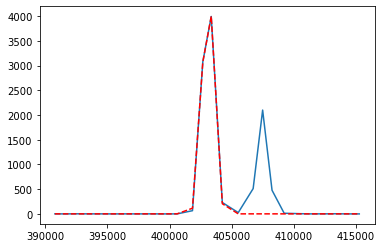

Z, Zrms = 0.5065061429116398 , 280.2675331193615


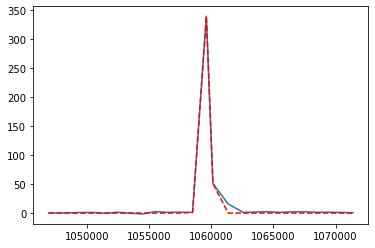

Z, Zrms = -50.21436222558052 , 52.06685186566237


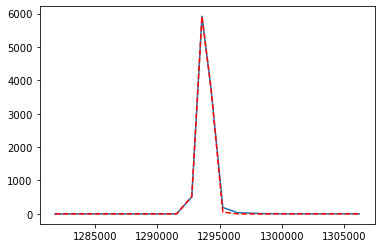

Z, Zrms = -709.1659710945156 , 1203.4851694074093


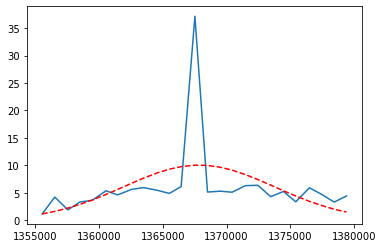

In [12]:
events_window_Zrms_single = np.array([ max(z) for z in np.array(events_window_Zrms) ])
events_Zgauss = []

for ievt in range(len(events_window_Zrms)):
    E = events_window_energy[ievt][-1]
    
    if E > 100:
        
        try:
            mean0 = np.mean(events_times[ievt])
            amp0 = np.max(events_sumwf[ievt])
            stdev0 = 5000

            xdata = events_times[ievt]
            ydata = events_sumwf[ievt]
            popt, pcov = curve_fit(gauss, xdata, ydata, p0 = (amp0, mean0, stdev0))
            amp, mean, stdev = popt

            Z = exp_dt(stdev/1000)
            Zrms = events_window_Zrms_single[ievt]

            if abs(Z - Zrms) > 100:
                print('Z, Zrms =', Z, ',', Zrms)
                fitdata = gauss(xdata, *popt)
                plt.plot(xdata, ydata)
                plt.plot(xdata, fitdata, '--', color='r')
                plt.show()
        except:
            Z = -1
        
    else:
        
        Z = -1
        
    events_Zgauss.append(Z)
    
events_Zgauss = np.array(events_Zgauss)


In [13]:
print(len(events_window_maxX))
print(len(events_window_maxY))
print(len(events_window_rms))
print(len(events_window_width))
print(len(events_window_energy))
print(len(events_window_charge))
print(len(events_window_Zrms))
print(len(events_sumwf))
print(len(events_times))
print('-------------')
print(len(events_window_maxX[0]))
print(len(events_window_maxY[0]))
print(len(events_window_rms[0]))
print(len(events_window_width[0]))
print(len(events_window_energy[0]))
print(len(events_window_charge[0]))
print(len(events_window_Zrms[0]))
print(len(events_sumwf[0]))
print(len(events_times[0]))

1012
1012
1012
1012
1012
1012
1012
1012
1012
-------------
400
400
400
400
400
400
400
26
26


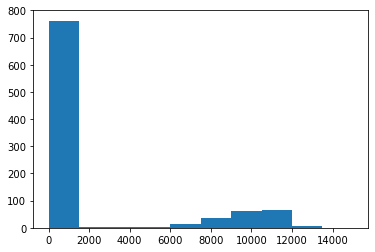

In [14]:
events_energy = [ events_window_energy[e][-1] for e in range(len(events_window_energy)) ]

emax = Ecut[1]
plt.hist(events_energy, bins = 10, range = (0, emax))
plt.show()

In [15]:
events_window_cut = [ [ 2 * (100 + i) * 25 for i in range(nwindow)] for evt in events_window_width ]
events_window_energy_norm = [ [ peak / max(max(window_energy), 0.1) for peak in window_energy ] for window_energy in events_window_energy ]

In [16]:
# If you are at nth window, then adding 50 ns is (n+1)st window, so adding 5 us is 5,000 ns which is 5,000/50 = 100 bins

##############
EVENT NUMBER 23
##############
Window size at which energy is 0.999: 23800
Zrms = 132.3615184754088


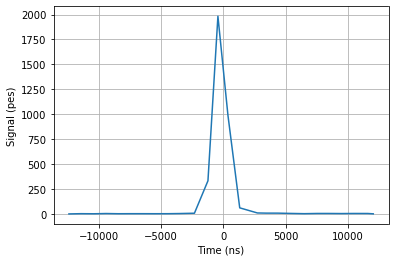

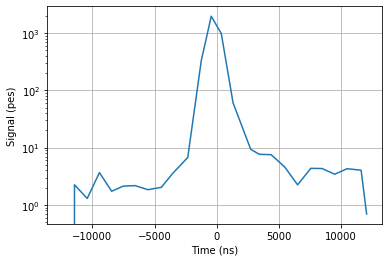

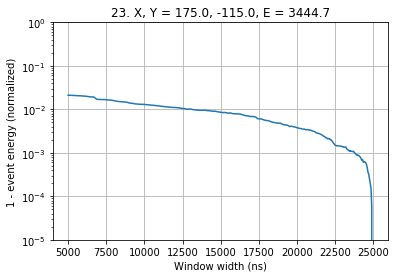

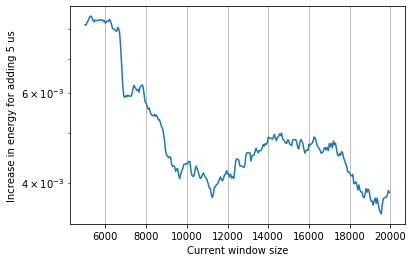

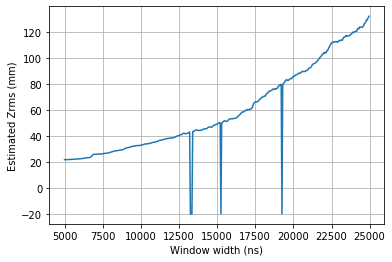

##############
EVENT NUMBER 124
##############
Window size at which energy is 0.999: 20550
Zrms = 113.73949491788346


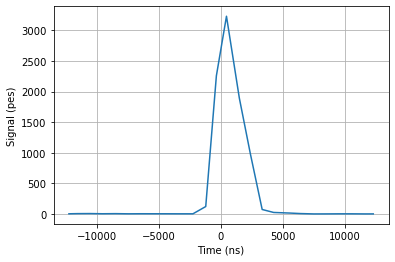

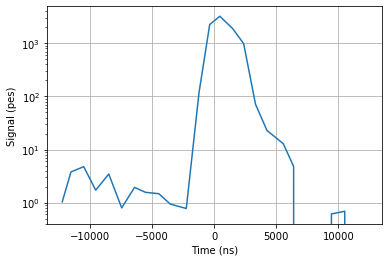

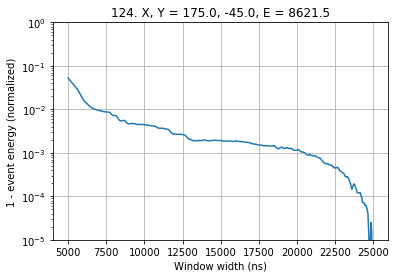

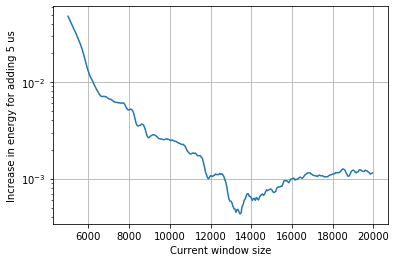

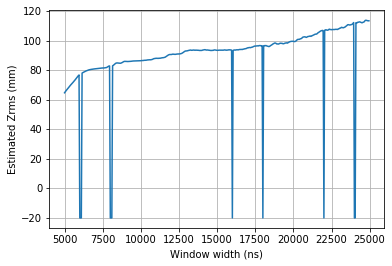

##############
EVENT NUMBER 166
##############
Window size at which energy is 0.999: 21550
Zrms = 42.95541421534638


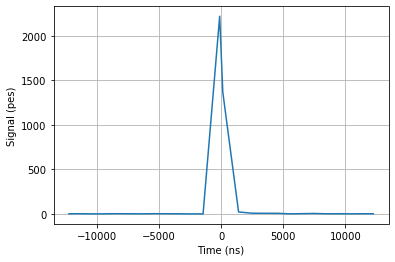

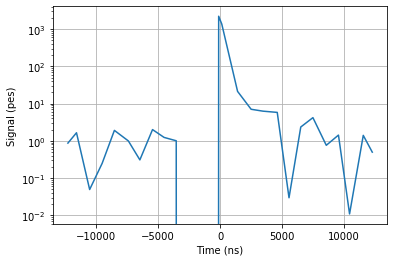

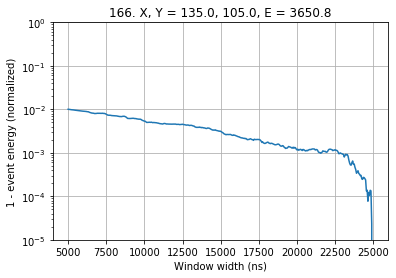

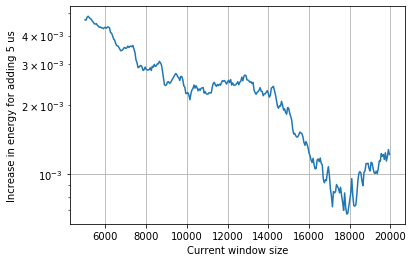

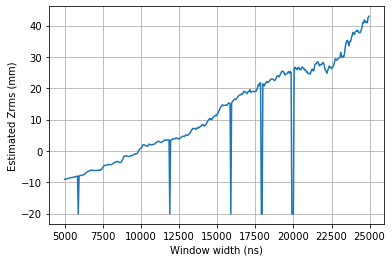

##############
EVENT NUMBER 466
##############
Window size at which energy is 0.999: 20450
Zrms = 288.38252855956154


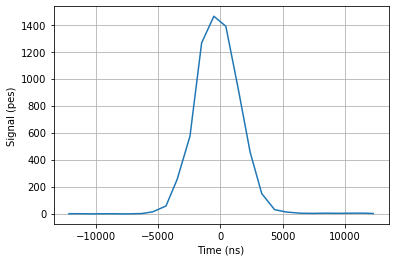

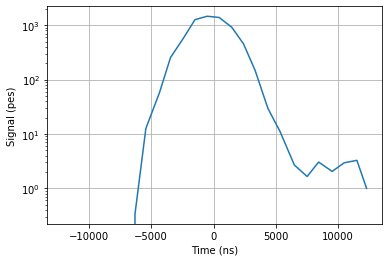

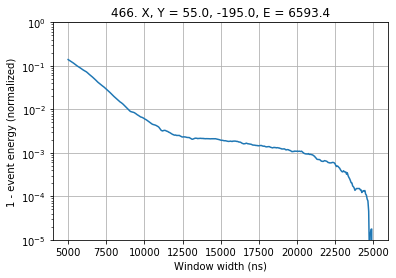

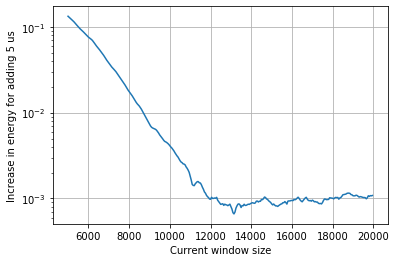

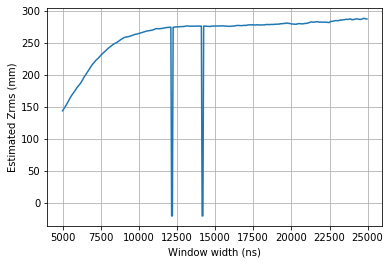

##############
EVENT NUMBER 602
##############
Window size at which energy is 0.999: 20850
Zrms = 293.6572010281004


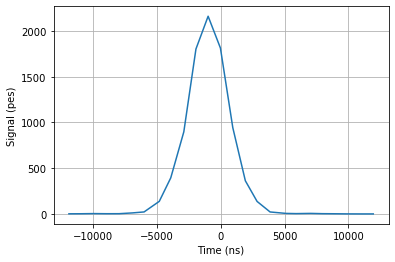

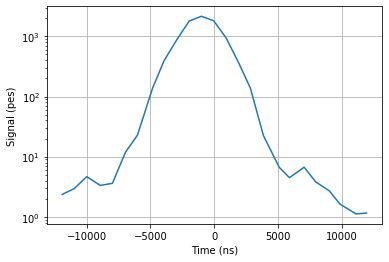

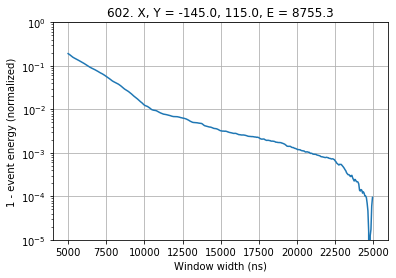

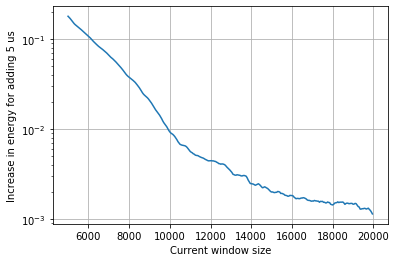

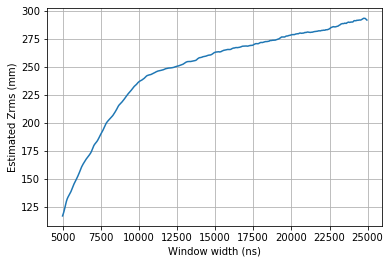

##############
EVENT NUMBER 672
##############
Window size at which energy is 0.999: 21350
Zrms = 67.72673513751981


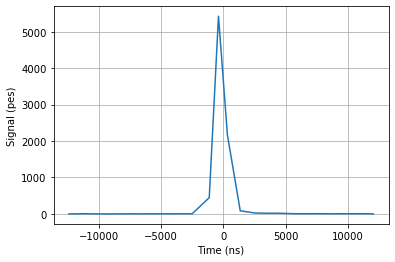

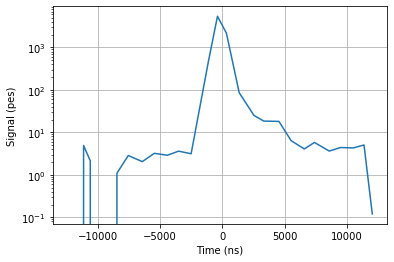

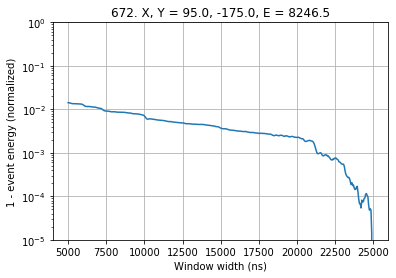

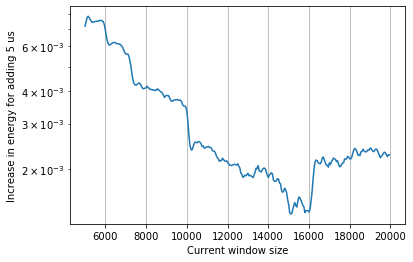

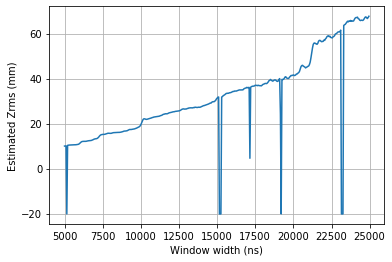

##############
EVENT NUMBER 717
##############
Window size at which energy is 0.999: 22100
Zrms = 78.59517457431616


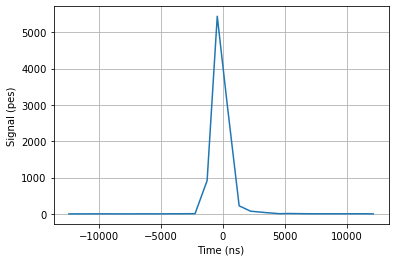

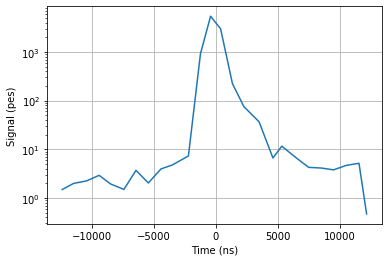

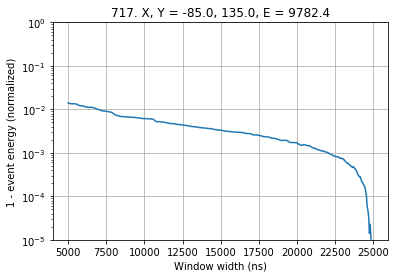

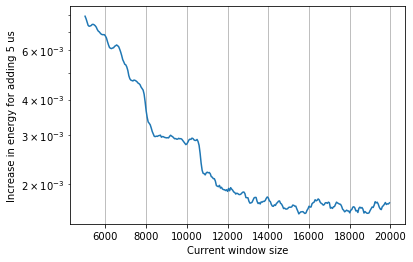

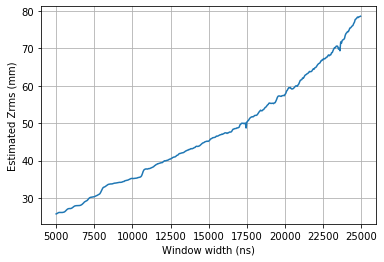

##############
EVENT NUMBER 727
##############
Window size at which energy is 0.999: 21700
Zrms = 56.603822802489134


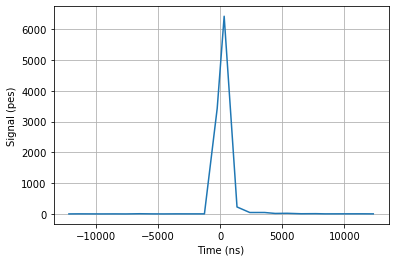

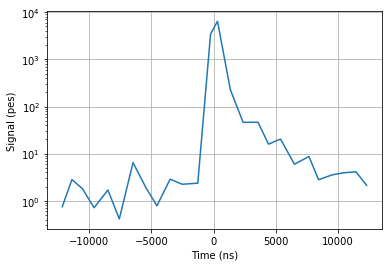

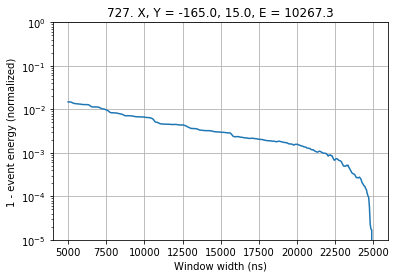

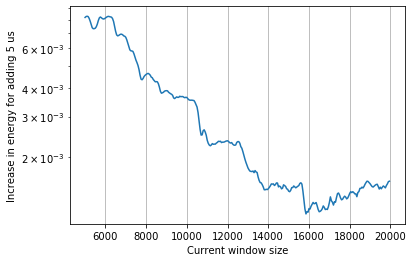

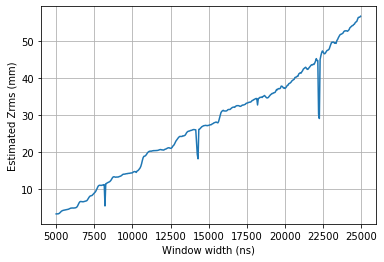

##############
EVENT NUMBER 743
##############
Window size at which energy is 0.999: 21300
Zrms = 193.6364959906199


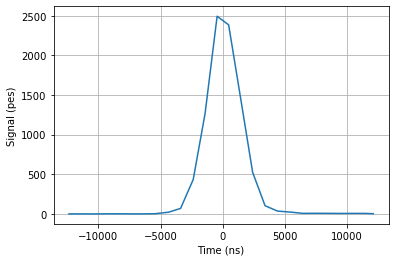

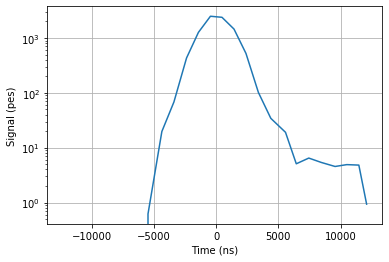

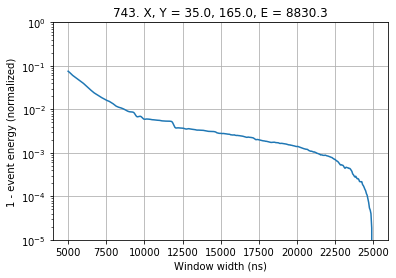

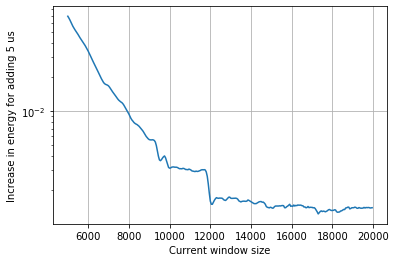

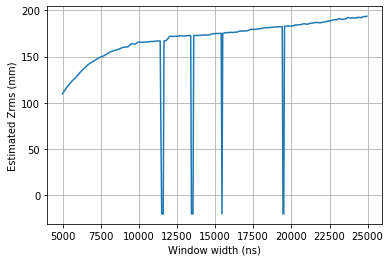

##############
EVENT NUMBER 760
##############
Window size at which energy is 0.999: 22600
Zrms = 295.30403313848024


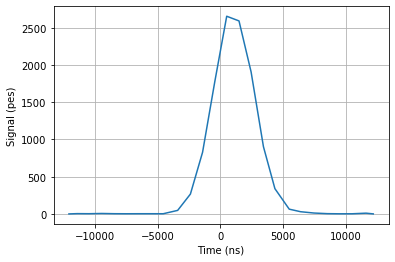

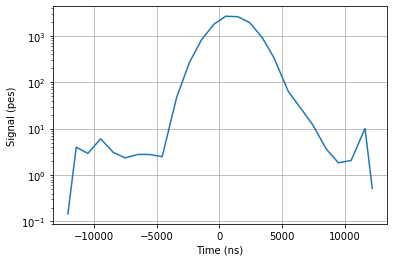

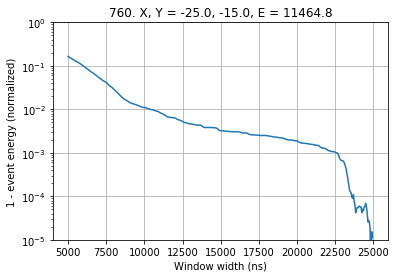

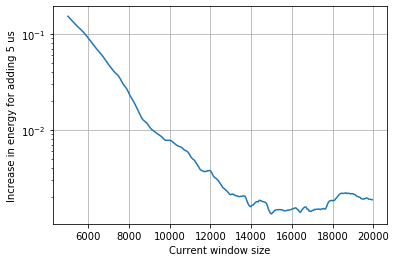

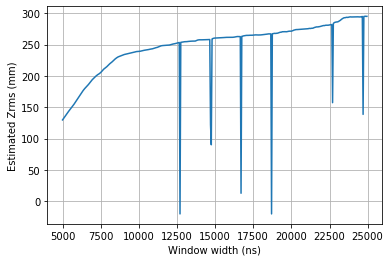

##############
EVENT NUMBER 765
##############
Window size at which energy is 0.999: 21500
Zrms = 102.43158792012582


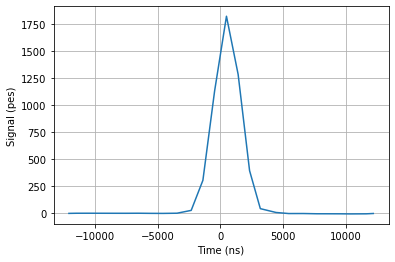

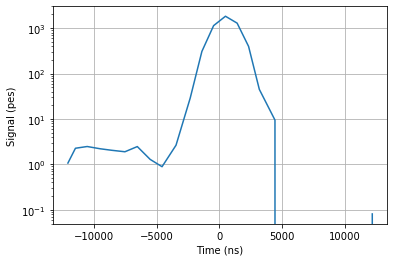

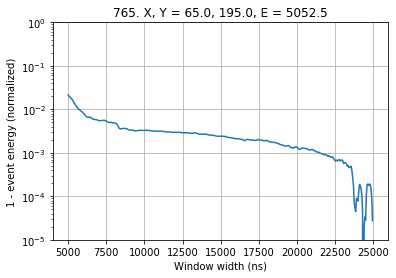

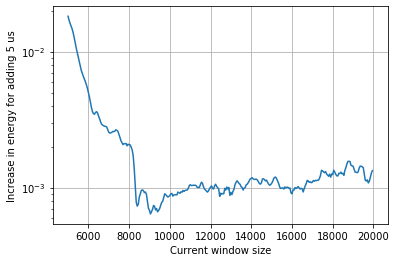

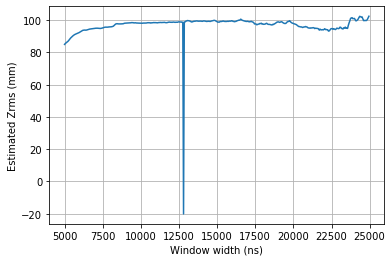

##############
EVENT NUMBER 800
##############
Window size at which energy is 0.999: 20700
Zrms = 164.126988421644


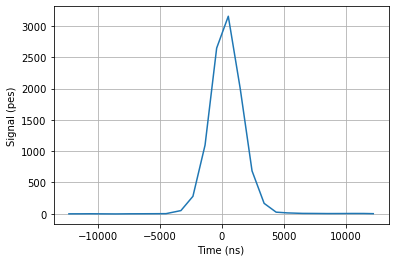

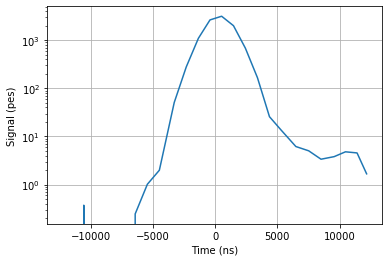

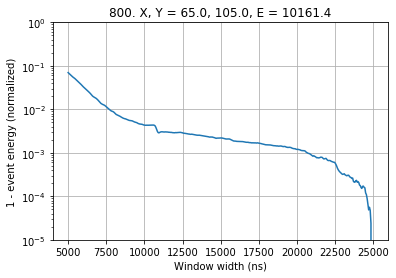

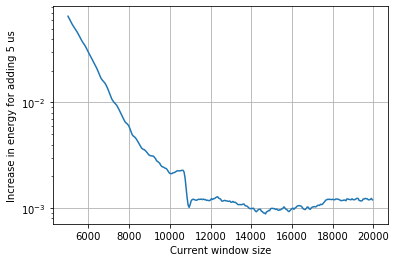

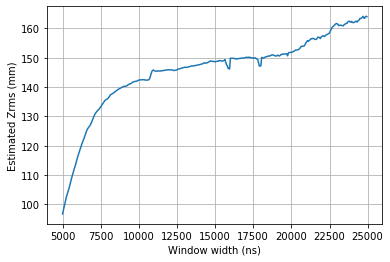

##############
EVENT NUMBER 833
##############
Window size at which energy is 0.999: 21300
Zrms = 79.66198427356912


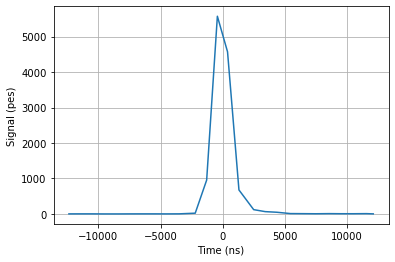

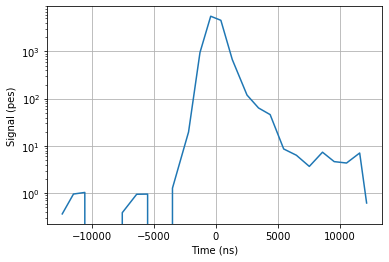

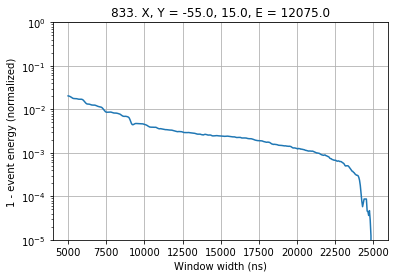

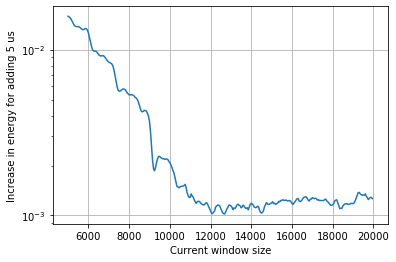

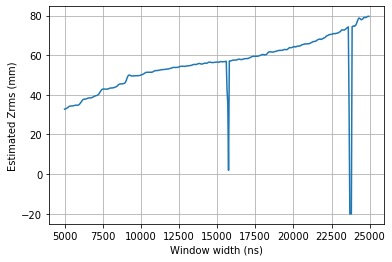

##############
EVENT NUMBER 934
##############
Window size at which energy is 0.999: 20900
Zrms = 52.06685186566237


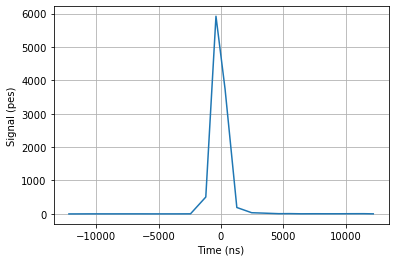

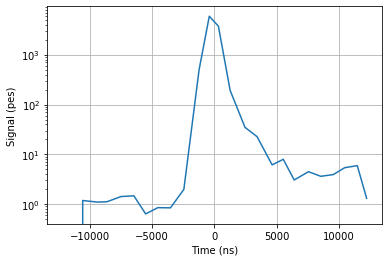

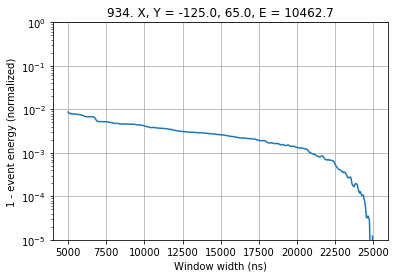

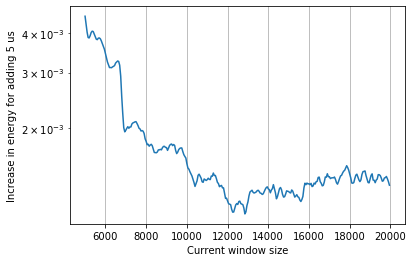

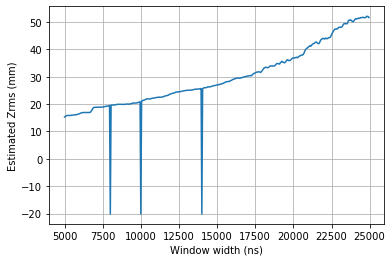

In [17]:
all_energy_cutoffs_999 = []
all_energy_cutoffs_99 = []
all_Zrms = []
all_Zgauss = []

maxshow = 100
shown = 0
for i_evt in range(len(events_window_energy_norm)):
    X = events_window_maxX[i_evt][-1]
    Y = events_window_maxY[i_evt][-1]
    E = round(max(events_window_energy[i_evt]), 1)
    Zrms = np.max(events_window_Zrms[i_evt])
    Zgauss = events_Zgauss[i_evt]
    if E > Ecut[0] and E < Ecut[1]:
        
        energy_cutoff_999 = 2 * (100 + np.argmax(np.array(events_window_energy_norm[i_evt]) > 0.999)) * 25
        all_energy_cutoffs_999.append(energy_cutoff_999)

        energy_cutoff_99 = 2 * (100 + np.argmax(np.array(events_window_energy_norm[i_evt]) > 0.99)) * 25
        all_energy_cutoffs_99.append(energy_cutoff_99)

        all_Zrms.append(Zrms)
        all_Zgauss.append(Zgauss)
        
        if shown < maxshow and energy_cutoff_999 > 20000 and Zrms < 300:

            shown += 1

            print('##############')
            print('EVENT NUMBER', i_evt)
            print('##############')

            print('Window size at which energy is 0.999:', energy_cutoff_999)
            print('Zrms =', Zrms)

            # Plot the waveform
            plt.xlabel('Time (ns)')
            plt.ylabel('Signal (pes)')
            plt.plot(events_times[i_evt] - np.mean(events_times[i_evt]), events_sumwf[i_evt])
            plt.grid(True)
            plt.show()

            # Plot the waveform, log scale
            plt.xlabel('Time (ns)')
            plt.ylabel('Signal (pes)')
            plt.yscale('log')
            plt.plot(events_times[i_evt] - np.mean(events_times[i_evt]), events_sumwf[i_evt])
            plt.grid(True)
            plt.show()

            # Plot the energy vs window width
            normed = np.array(events_window_energy_norm[i_evt])
            normed = 1 - normed
            plt.ylim(10**-5,10**0)
            plt.yscale('log')
            plt.title(str(i_evt)+'. X, Y = '+str(X)+', '+str(Y)+', E = '+str(E))
            plt.xlabel('Window width (ns)')
            plt.ylabel('1 - event energy (normalized)')
            plt.grid(True)
            plt.plot(events_window_cut[i_evt], normed)
            plt.show()

            # Plot the increase for including 5 more us
            change_next_five_us = np.array(events_window_energy_norm[i_evt][100:]) - np.array(events_window_energy_norm[i_evt][:300])    
            plt.xlabel('Current window size')
            plt.ylabel('Increase in energy for adding 5 us')
            plt.yscale('log')
            plt.plot(events_window_cut[i_evt][:300], change_next_five_us)
            plt.grid(True)
            plt.show()

            # Plot the Zrms estimate vs window width
            plt.xlabel('Window width (ns)')
            plt.ylabel('Estimated Zrms (mm)')
            plt.plot(events_window_cut[i_evt], events_window_Zrms[i_evt])
            plt.grid(True)
            plt.show()

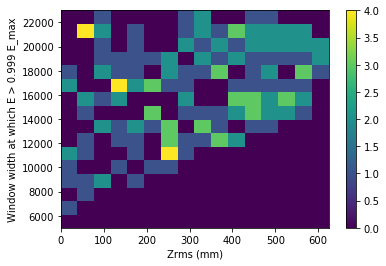

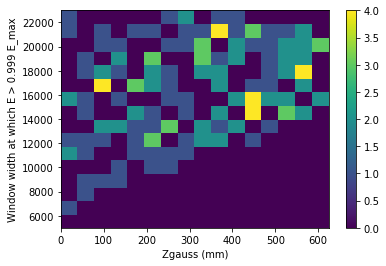

In [18]:
window_range = (5000, 23000)
bins = (16, 16)
zrange = (0, 625)

hrms = plt.hist2d(all_Zrms, all_energy_cutoffs_999, bins = bins, range = (zrange, window_range))
plt.xlim(zrange)
plt.xlabel('Zrms (mm)')
plt.ylabel('Window width at which E > 0.999 E_max')
plt.colorbar(hrms[3])
plt.show()

hgauss = plt.hist2d(all_Zgauss, all_energy_cutoffs_999, bins = bins, range = (zrange, window_range))
plt.xlim(zrange)
plt.xlabel('Zgauss (mm)')
plt.ylabel('Window width at which E > 0.999 E_max')
plt.colorbar(hgauss[3])
plt.show()

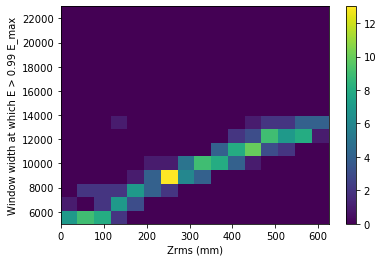

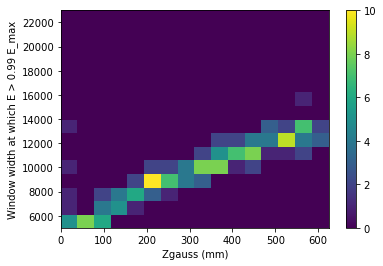

In [19]:
hrms = plt.hist2d(all_Zrms, all_energy_cutoffs_99, bins = bins, range = (zrange, window_range))
plt.xlim(zrange)
plt.xlabel('Zrms (mm)')
plt.ylabel('Window width at which E > 0.99 E_max')
plt.colorbar(hrms[3])
plt.show()

hgauss = plt.hist2d(all_Zgauss, all_energy_cutoffs_99, bins = bins, range = (zrange, window_range))
plt.xlim(zrange)
plt.xlabel('Zgauss (mm)')
plt.ylabel('Window width at which E > 0.99 E_max')
plt.colorbar(hgauss[3])
plt.show()

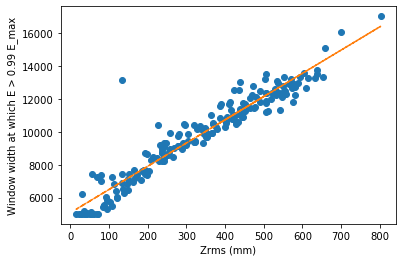

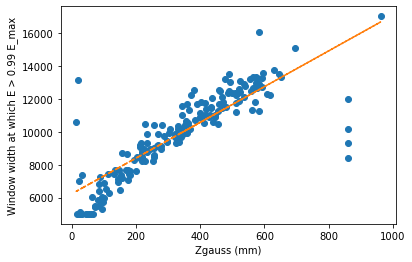

In [20]:
all_Zrms = np.array(all_Zrms)
all_Zgauss = np.array(all_Zgauss)
all_energy_cutoffs_99 = np.array(all_energy_cutoffs_99)
all_energy_cutoffs_999 = np.array(all_energy_cutoffs_999)

p = np.polyfit(all_Zrms, all_energy_cutoffs_99, 1)
line = np.array(all_Zrms)*p[0] + p[1]
plt.xlabel('Zrms (mm)')
plt.ylabel('Window width at which E > 0.99 E_max')
plt.plot(all_Zrms, all_energy_cutoffs_99, 'o')
plt.plot(all_Zrms, line, '--')
plt.show()

good_gauss = all_Zgauss > 0
p = np.polyfit(all_Zgauss[good_gauss], all_energy_cutoffs_99[good_gauss], 1)
line = np.array(all_Zgauss[good_gauss])*p[0] + p[1]
plt.xlabel('Zgauss (mm)')
plt.ylabel('Window width at which E > 0.99 E_max')
plt.plot(all_Zgauss[good_gauss], all_energy_cutoffs_99[good_gauss], 'o')
plt.plot(all_Zgauss[good_gauss], line, '--')
plt.show()

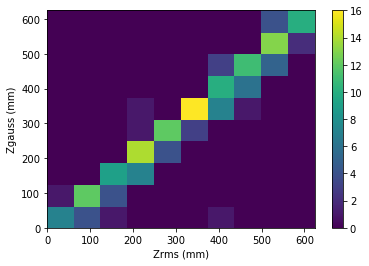

In [21]:
hZ = plt.hist2d(all_Zrms, all_Zgauss, range = (zrange, zrange))
plt.xlabel('Zrms (mm)')
plt.ylabel('Zgauss (mm)')
plt.colorbar(hZ[3])
plt.show()

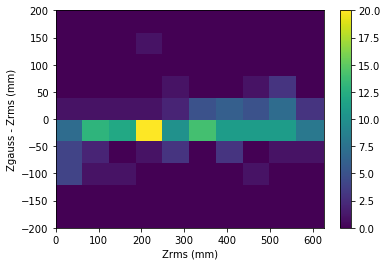

In [22]:
all_dZ = np.array(all_Zgauss) - np.array(all_Zrms)
dzrange = (-200, 200)
hdZ = plt.hist2d(all_Zrms, all_dZ, range = (zrange, dzrange))
plt.xlabel('Zrms (mm)')
plt.ylabel('Zgauss - Zrms (mm)')
plt.colorbar(hdZ[3])
plt.show()

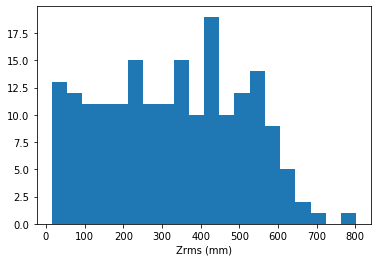

In [23]:
plt.hist(all_Zrms, bins = 20)
plt.xlabel('Zrms (mm)')
plt.show()

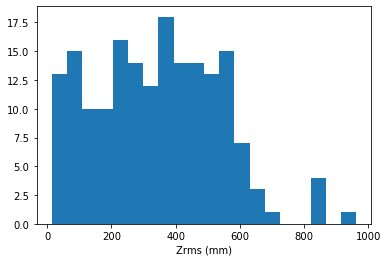

In [24]:
plt.hist(all_Zgauss[good_gauss], bins = 20)
plt.xlabel('Zrms (mm)')
plt.show()

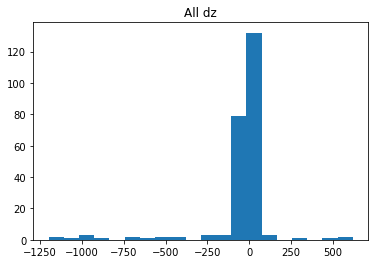

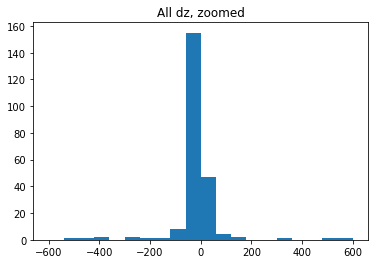

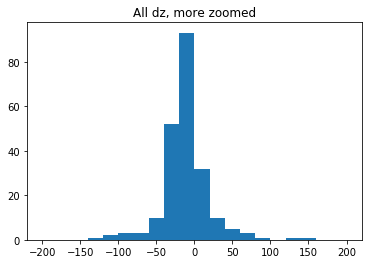

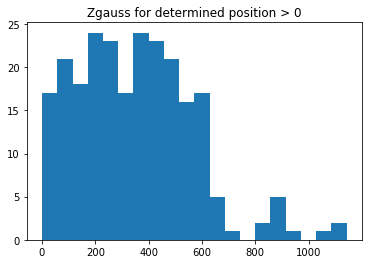

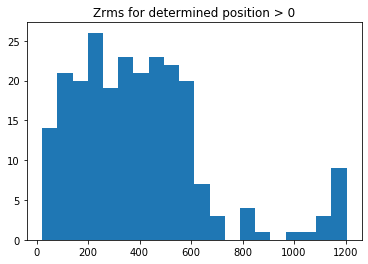

In [25]:
mask = events_Zgauss > 0
dZ = events_Zgauss[mask] - events_window_Zrms_single[mask]

plt.hist(dZ, bins = 20)
plt.title('All dz')
plt.show()

plt.hist(dZ, bins = 20, range = (-600, 600))
plt.title('All dz, zoomed')
plt.show()

plt.hist(dZ, bins = 20, range = (-200, 200))
plt.title('All dz, more zoomed')
plt.show()

plt.hist(events_Zgauss[mask], bins = 20)
plt.title('Zgauss for determined position > 0')
plt.show()

plt.hist(events_window_Zrms_single[mask], bins = 20)
plt.title('Zrms for determined position > 0')
plt.show()